# Proyecto regresión logística-platzi

### Explicación:

*Este proyecto está realizado para demostrar lo aprendido en el curso de Regresión logística en platzi explicada por el profesor Carlos Alarcón*

### Sobre dataset:

Este dataset tiene como objetivo la detección del cancer del seno.
Contiene columnas con caracteristicas y medidas que permite asociarlas a un tumor benigno o maligno. 

In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


In [355]:
df = pd.read_csv('/home/sebasgrande/DocumentosSebas/platzi/Data_scientis/projects/regresion_logistica/breast_cancer.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Preparando los datos

### Información de los features

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Tamaño del dataset

In [357]:
df.shape

(569, 33)

### Eliminando columnas irrelevantes

In [358]:
df.drop(['Unnamed: 32','id'],axis=1, inplace=True)

### Valores únicos

In [359]:
my_dict = {}

for i in list(df.columns):
    my_dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(my_dict,index=['unique']).T

,unique
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542
symmetry_mean,432


In [360]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

### Target

In [361]:
df['diagnosis'] = df.diagnosis.replace(['M','B'],[1,0])

Cambiaremos los valores de nuestro target de Maligno y benigno a 1 y 0 para que el modelo de maching learning
funcione mejor.

### Valores nulos

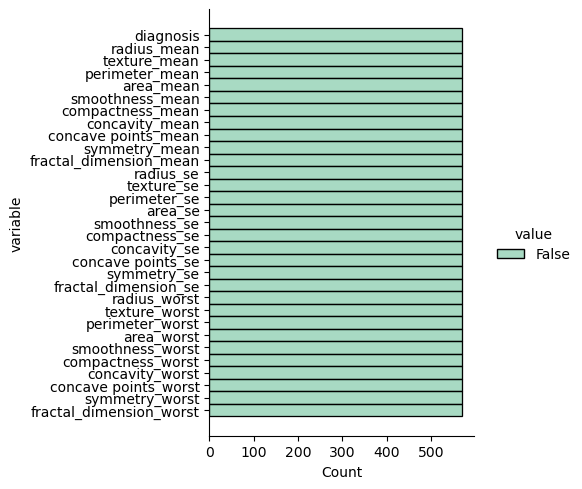

In [396]:
one_color=['#52b788']
df.isnull().melt().pipe(lambda df: sns.displot(
    data=df,
    y='variable',
    hue='value',
    palette=one_color
    ))
plt.show()

No existen valores faltantes en los datos.

# Análisis exploratorio de datos

En esta etapa se analizaran los datos con diferentes gráficas para comprender como 
afectan las diferentes variables a nuestra clasificación.

In [363]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## correlaciones

### Heatmap con todas las variables

Estos gráficos nos permiten saber qué tanto las varibles están relacionadas entre sí.

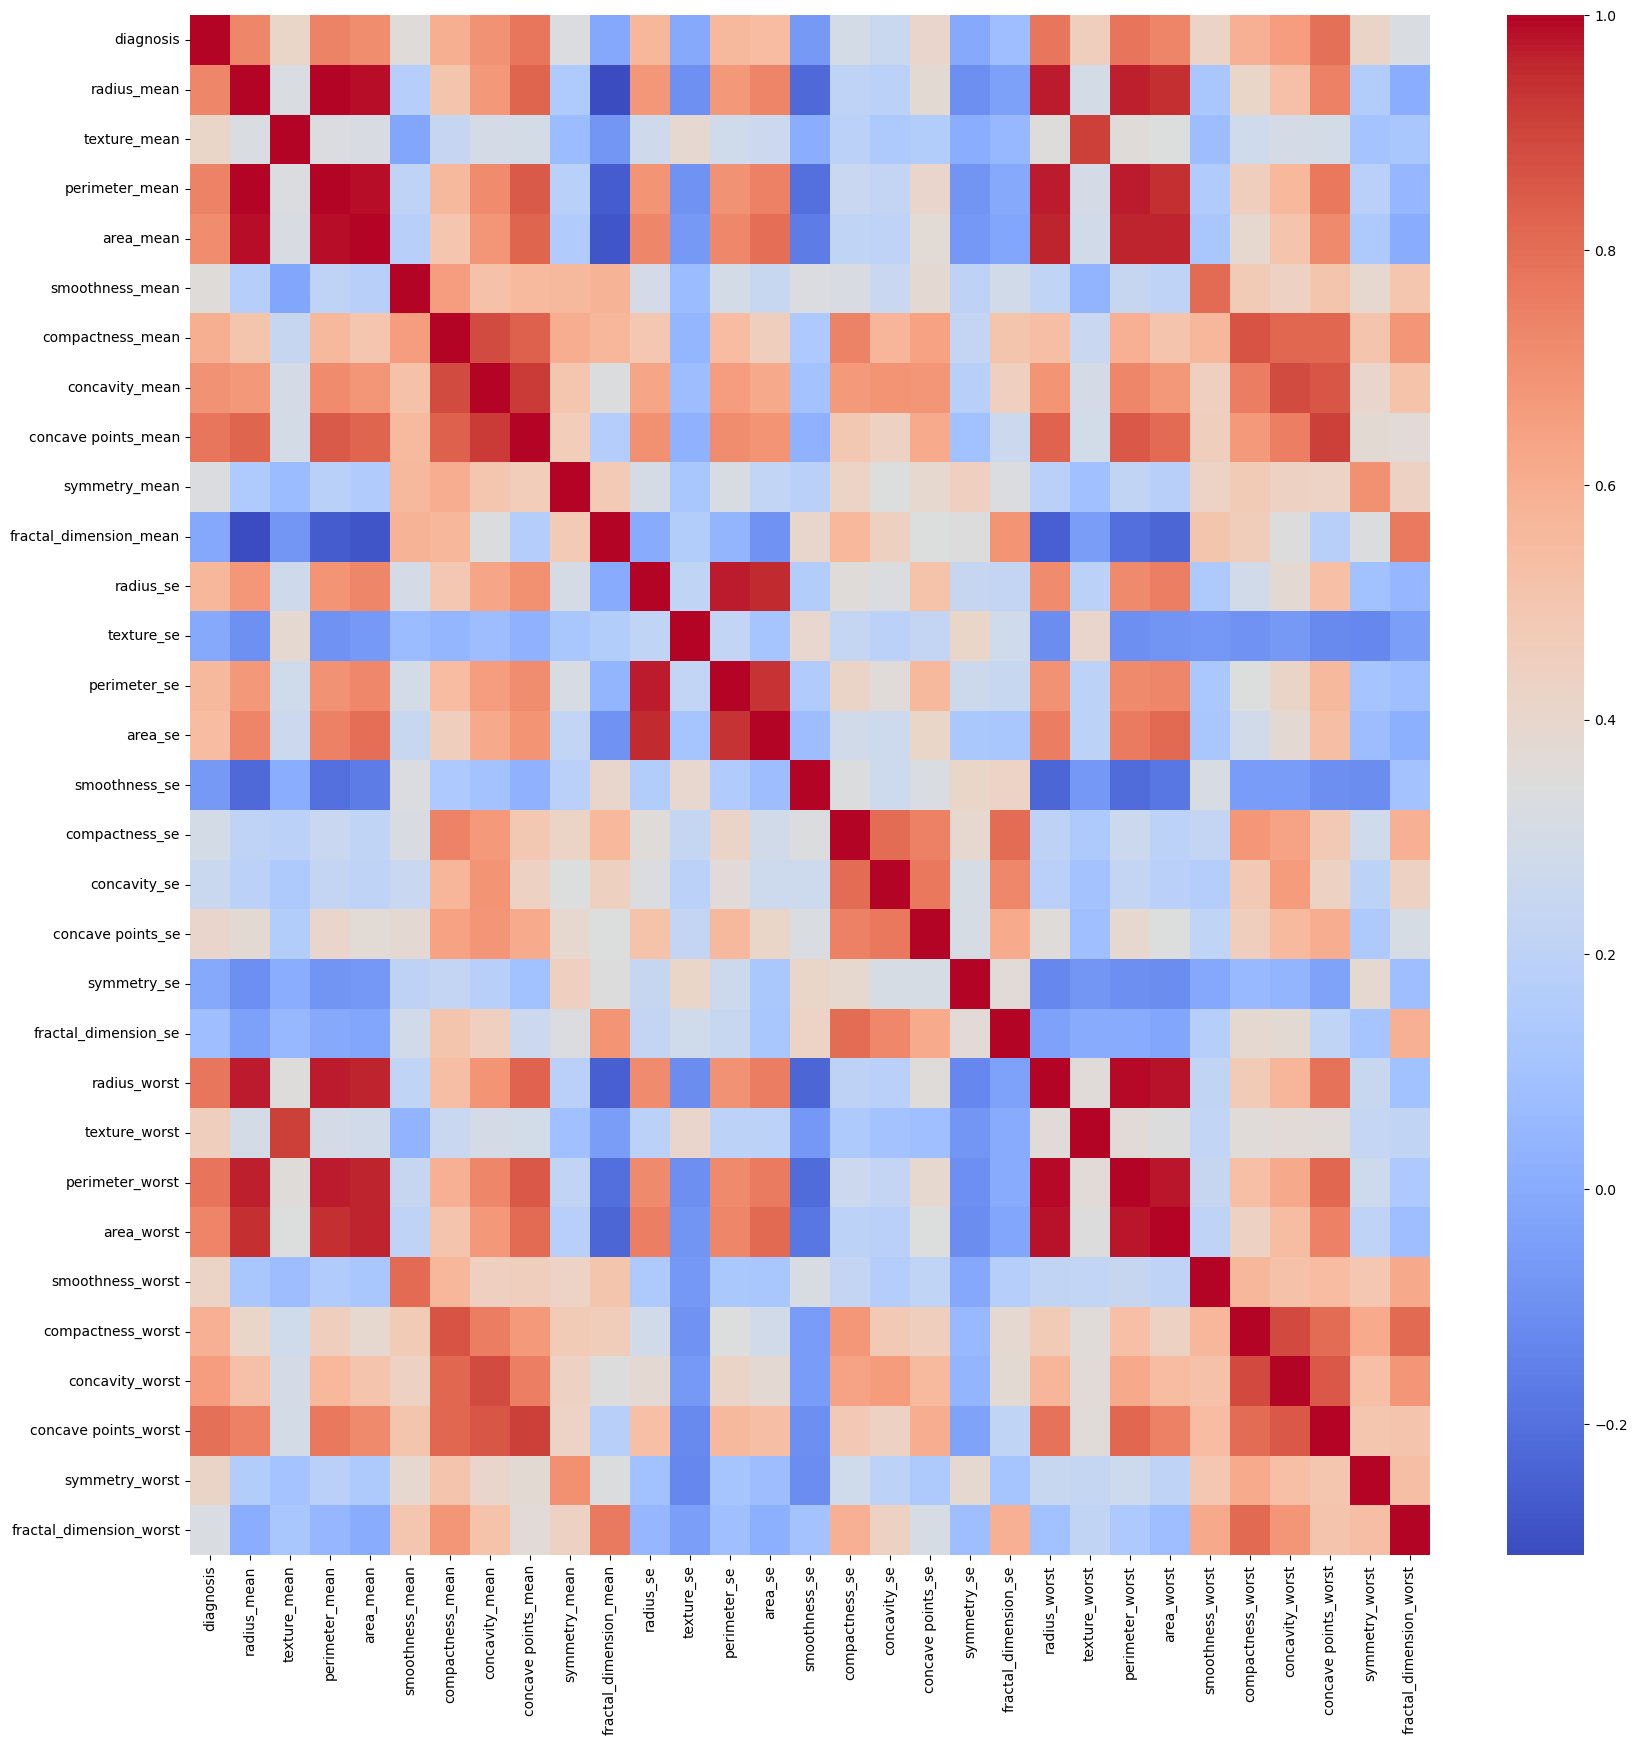

In [364]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

### Correlación de las variables respecto al diagnosis

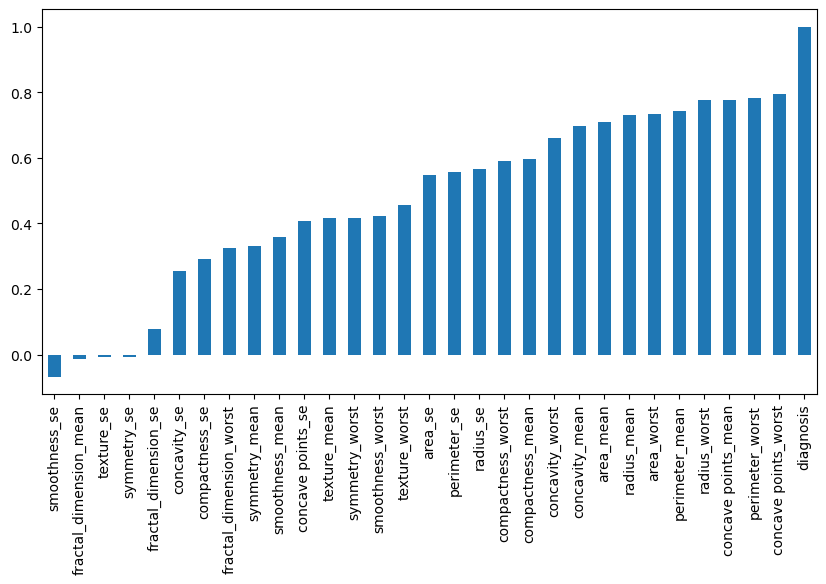

In [365]:
fig = plt.figure(figsize=(10,5))
df.corr()['diagnosis'].sort_values(ascending=True).plot(kind='bar')
plt.show()

### Variables con menor correlacion con nuestro target

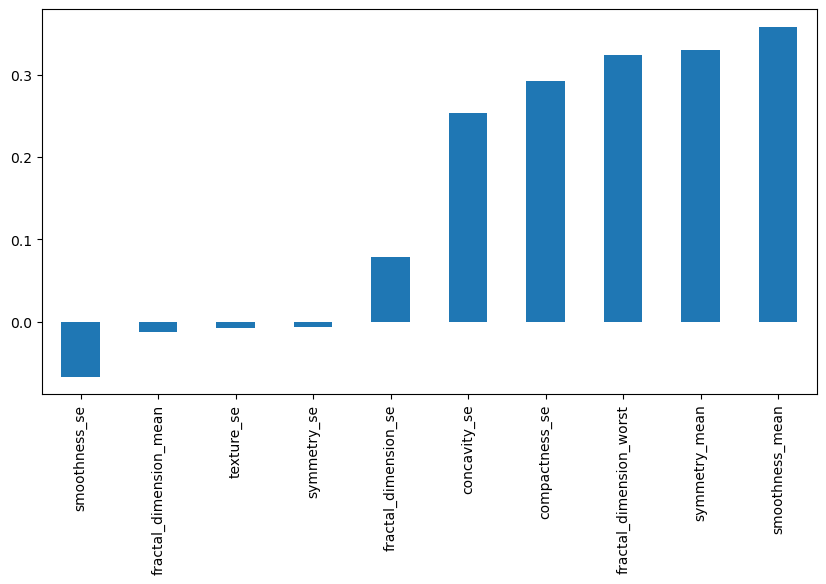

In [366]:
fig = plt.figure(figsize=(10,5))
df.corr()['diagnosis'].sort_values(ascending=True)[:10].plot(kind='bar')
plt.show()

### Variables con mayor correlación frente al target

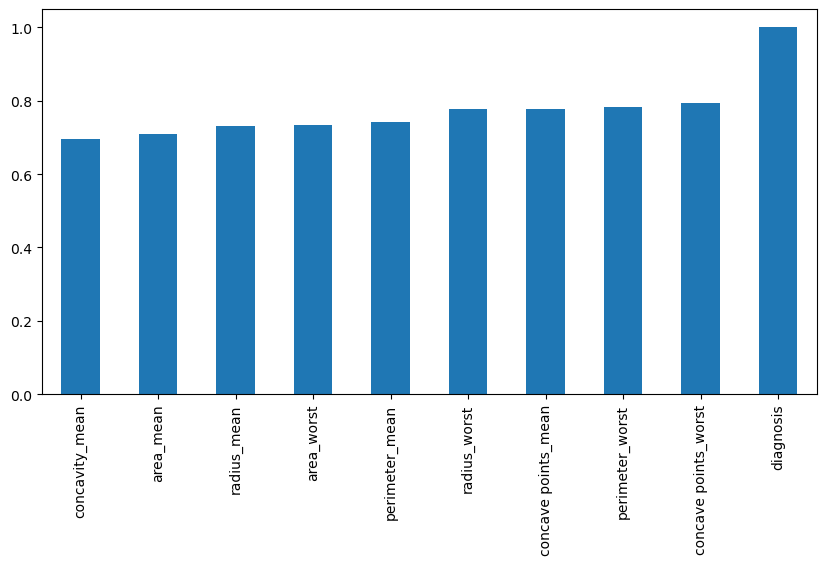

In [367]:
fig = plt.figure(figsize=(10,5))
df.corr()['diagnosis'].sort_values(ascending=True)[-10:].plot(kind='bar')
plt.show()

### Eliminación de variables por multicolonialidad

perimeter_worst y area_worst son columnas que tienen mucha relación con otras como vemos en las siguientes
gráficas. Por lo tanto, decidí eliminarlas para evitar multicolonialidad en los datos.

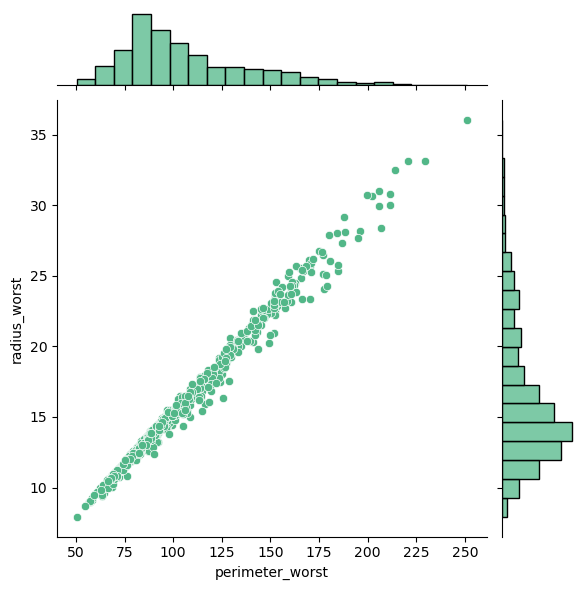

In [368]:
sns.jointplot(df,x='perimeter_worst',y='radius_worst',color='#52b788')
plt.show()

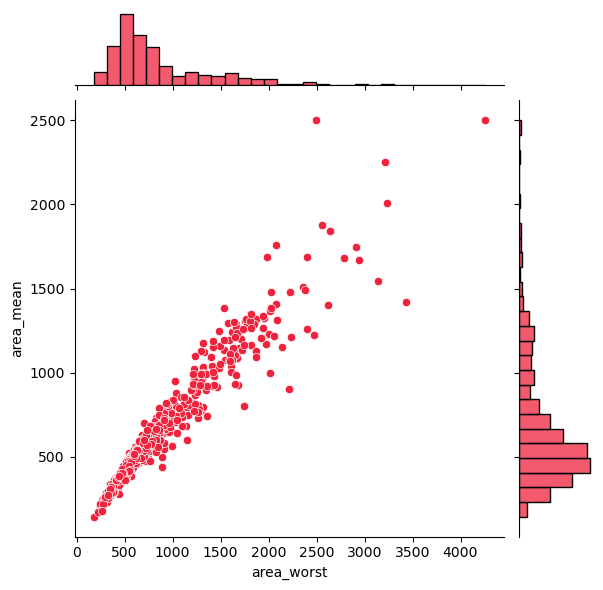

In [369]:
sns.jointplot(df,x='area_worst',y='area_mean',color="#ef233c")
plt.show()

In [370]:
df_2 = df.copy()
df_2.drop(['perimeter_worst','area_worst'],axis=1,inplace=True)

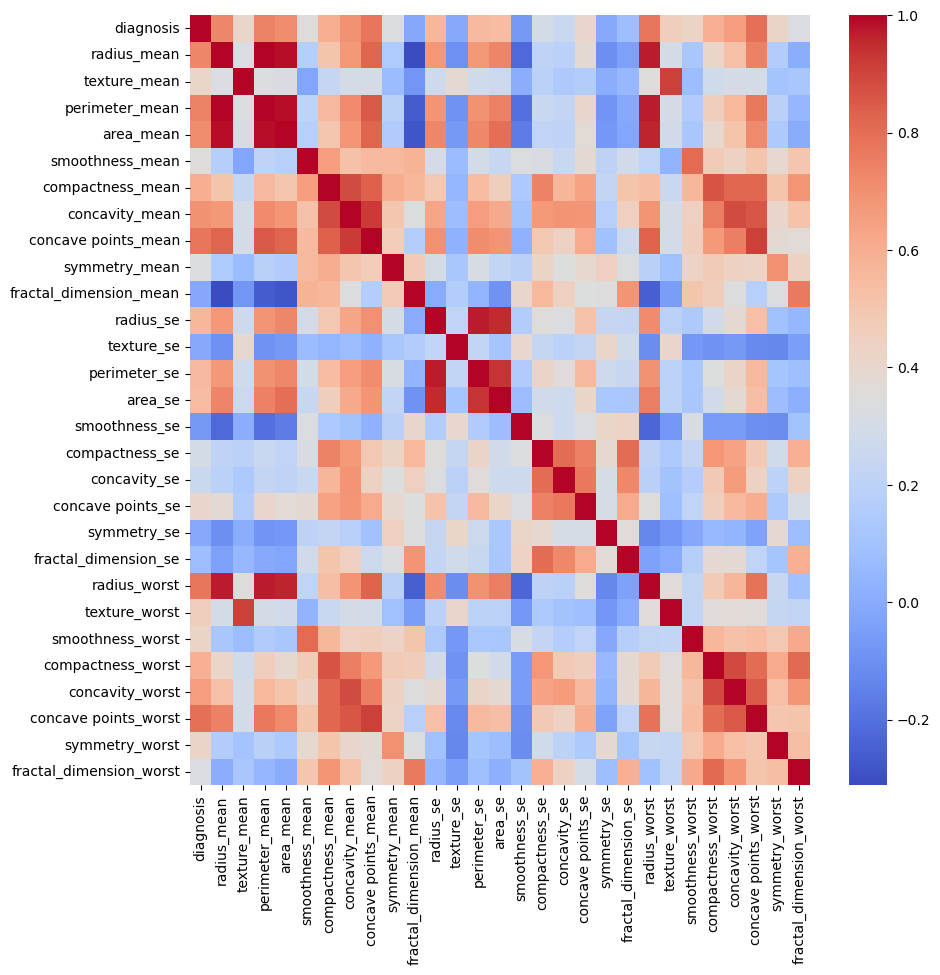

In [371]:
plt.figure(figsize=(10,10))
sns.heatmap(df_2.corr(),cmap='coolwarm')
plt.show()

In [372]:
df_without_target = df_2.copy()

In [373]:
df_without_target.drop('diagnosis',axis=1,inplace=True)

## Distribuciones

In [374]:
diagnosis_df = df_2[(df['diagnosis']==1)]
no_diagnosis_df = df_2[(df['diagnosis']==0)]

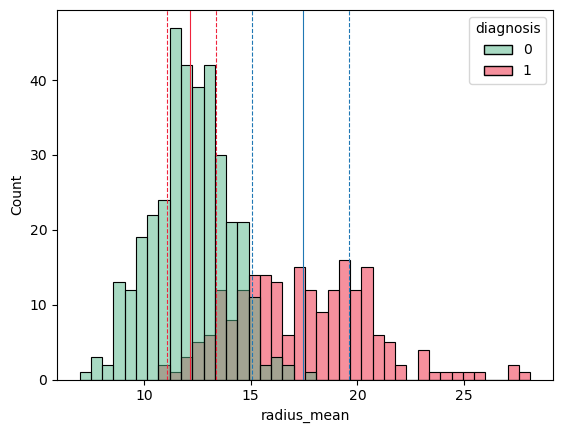

In [375]:
two_colors = ['#52b788','#ef233c']
sns.histplot(data=df_2,x='radius_mean',hue='diagnosis',bins=40,palette=two_colors)
plt.axvline(x=diagnosis_df['radius_mean'].mean(),linestyle='-',linewidth=0.8)
plt.axvline(x=diagnosis_df['radius_mean'].quantile(q=0.25),linestyle='dashed',linewidth=0.8)
plt.axvline(x=diagnosis_df['radius_mean'].quantile(q=0.75),linestyle='dashed',linewidth=0.8)
plt.axvline(x=no_diagnosis_df['radius_mean'].mean(),linestyle='-',linewidth=0.8,color='#ef233c')
plt.axvline(x=no_diagnosis_df['radius_mean'].quantile(q=0.25),linestyle='dashed',linewidth=0.8,color='#ef233c')
plt.axvline(x=no_diagnosis_df['radius_mean'].quantile(q=0.75),linestyle='dashed',linewidth=0.8,color='#ef233c')

In [376]:
def distplotea(feature):
    two_colors = ['#52b788','#ef233c']
    sns.histplot(data=df_2,x=feature,hue='diagnosis',bins=40,palette=two_colors)
    plt.axvline(x=diagnosis_df[feature].mean(),linestyle='-',linewidth=0.8)
    plt.axvline(x=diagnosis_df[feature].quantile(q=0.25),linestyle='dashed',linewidth=0.8)
    plt.axvline(x=diagnosis_df[feature].quantile(q=0.75),linestyle='dashed',linewidth=0.8)
    plt.axvline(x=no_diagnosis_df[feature].mean(),linestyle='-',linewidth=0.8,color='#ef233c')
    plt.axvline(x=no_diagnosis_df[feature].quantile(q=0.25),linestyle='dashed',linewidth=0.8,color='#ef233c')
    plt.axvline(x=no_diagnosis_df[feature].quantile(q=0.75),linestyle='dashed',linewidth=0.8,color='#ef233c')
    plt.show()

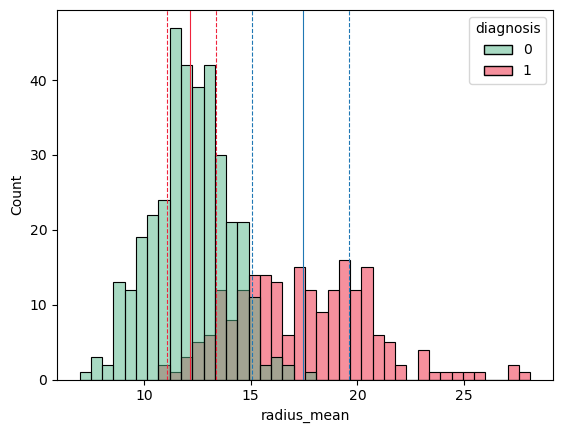

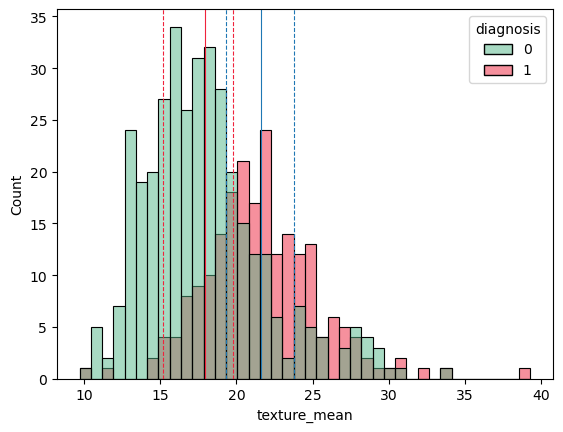

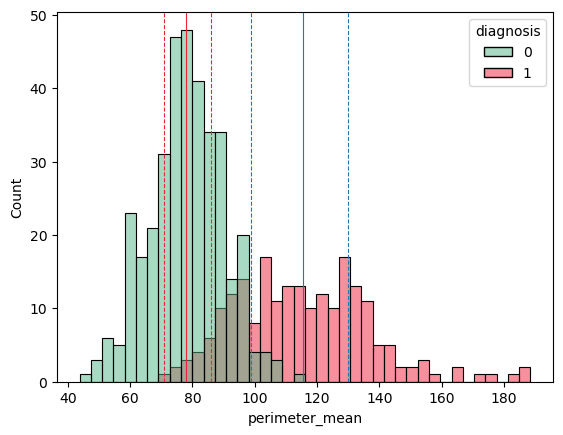

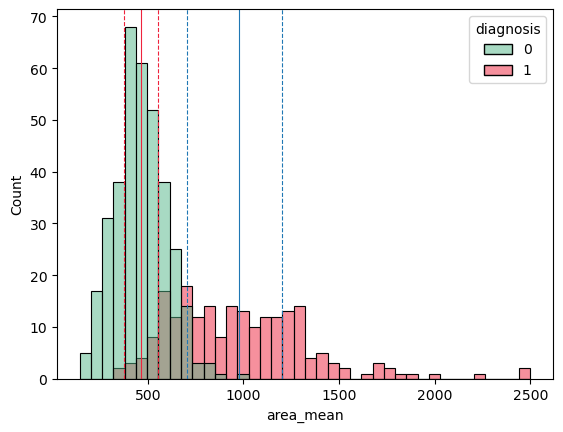

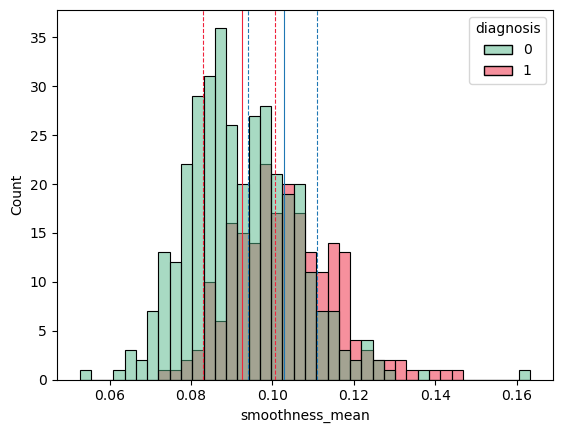

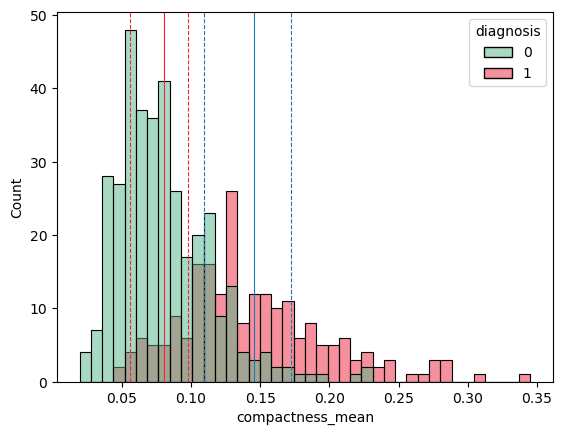

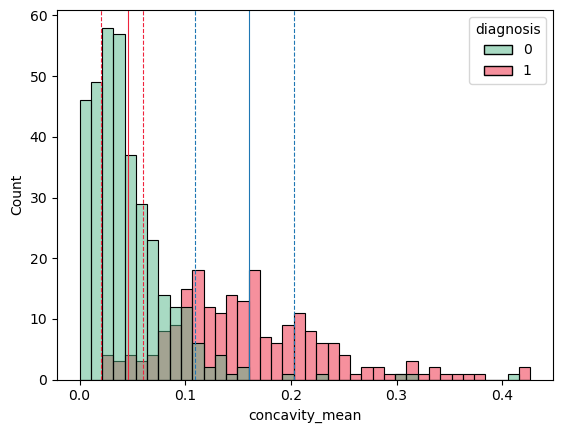

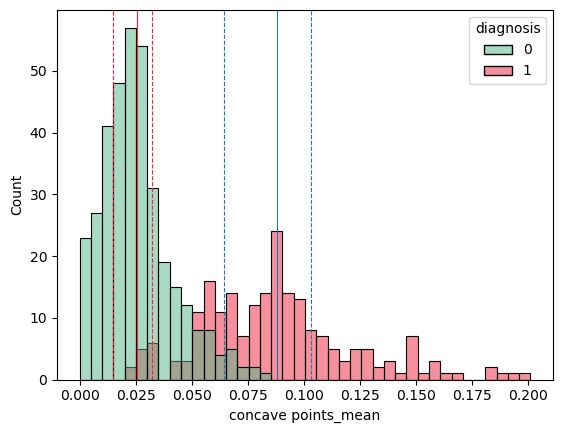

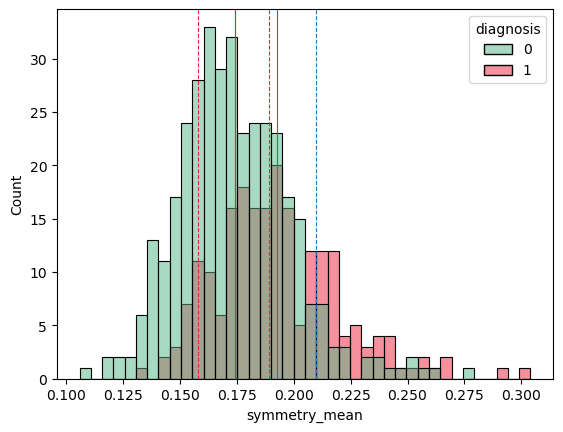

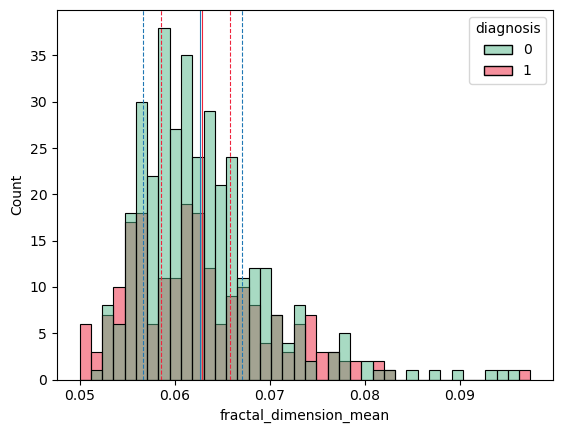

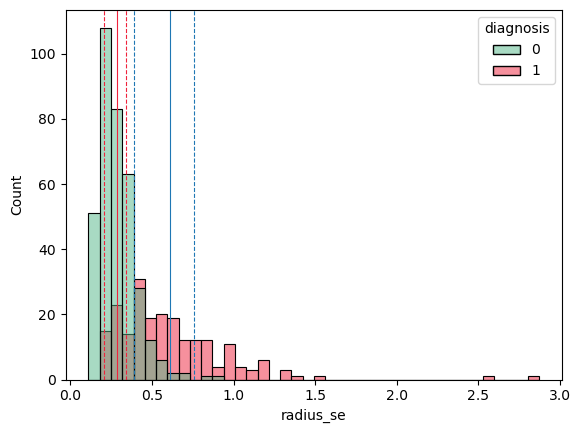

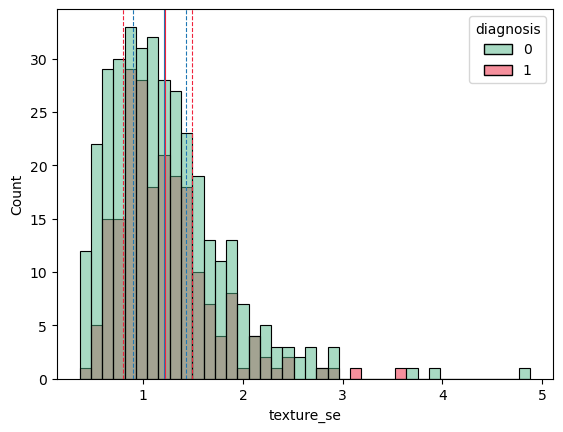

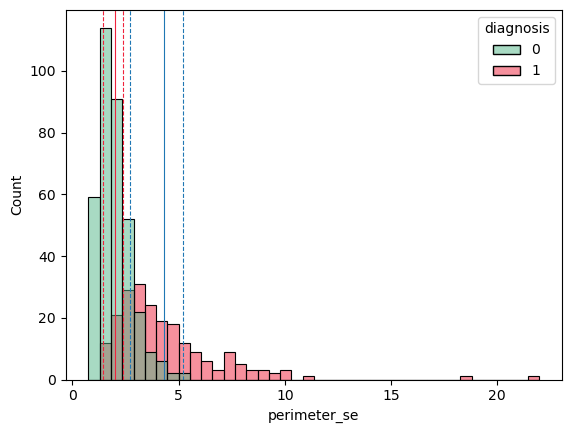

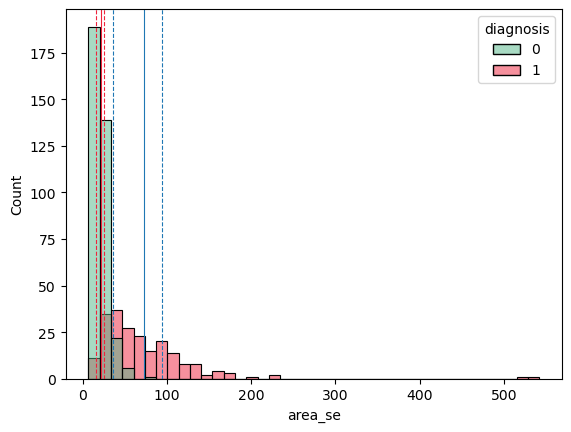

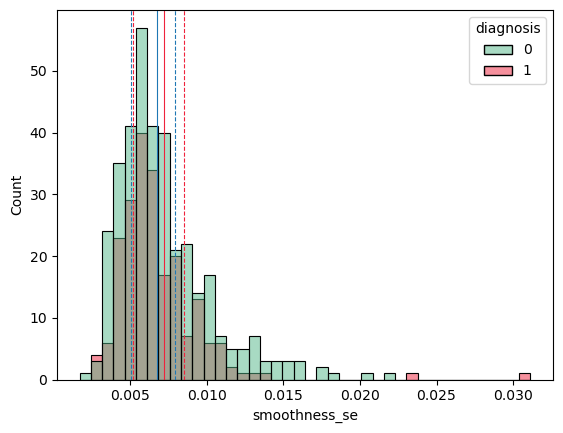

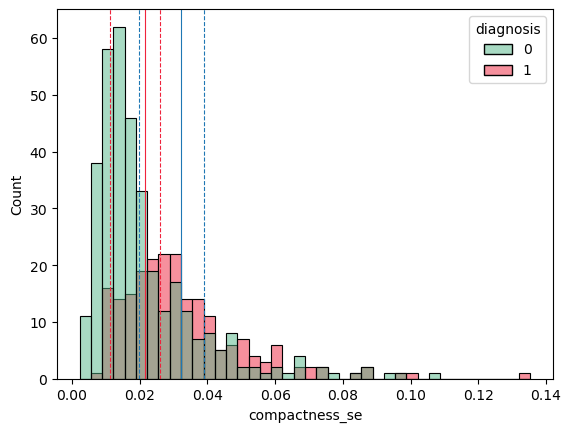

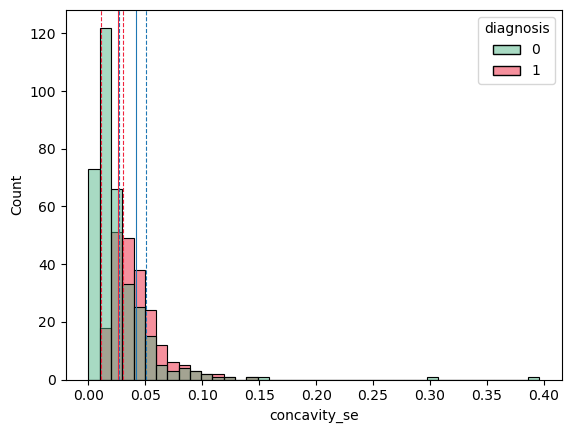

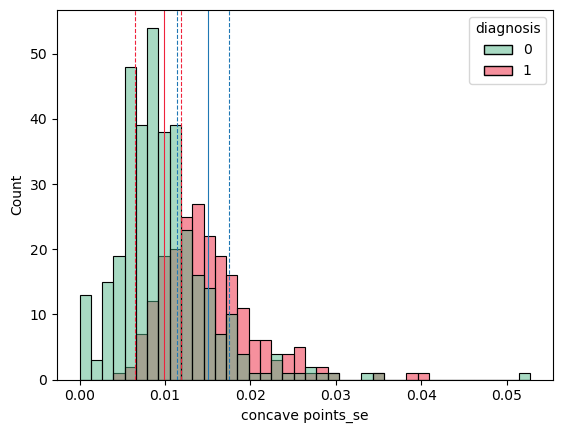

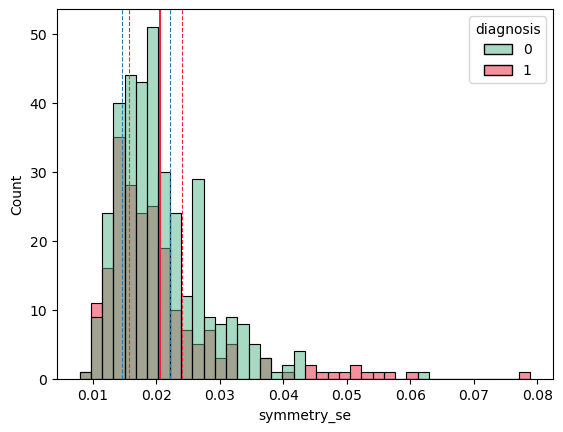

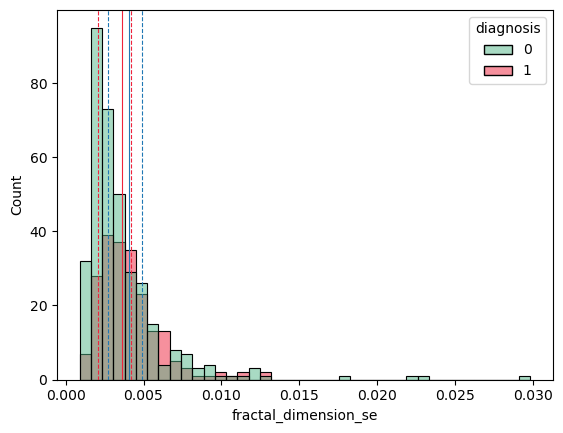

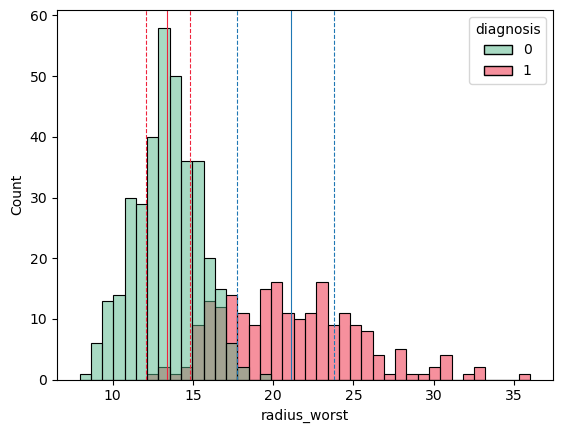

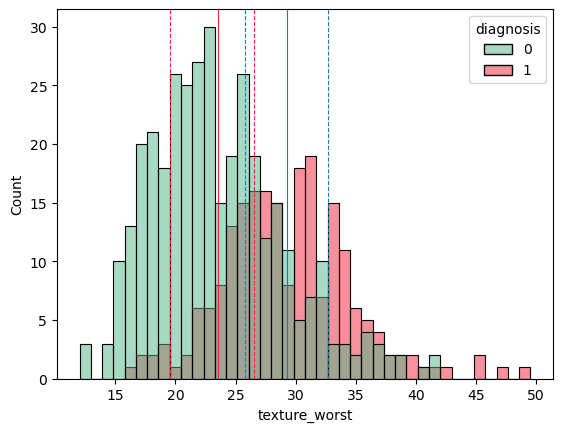

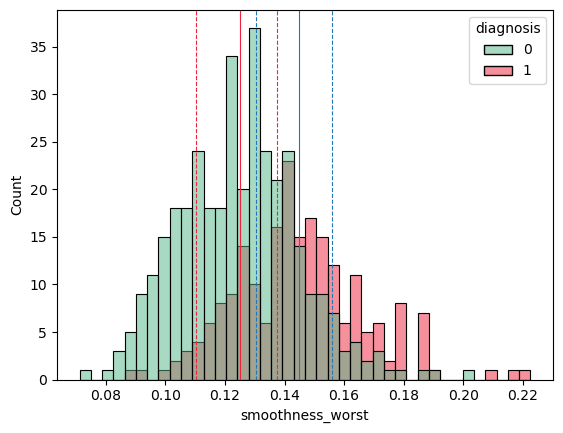

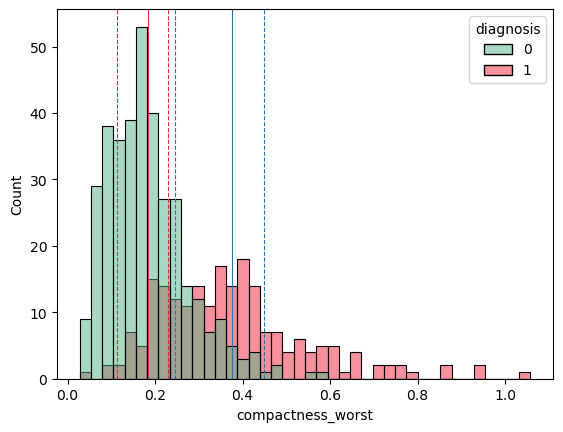

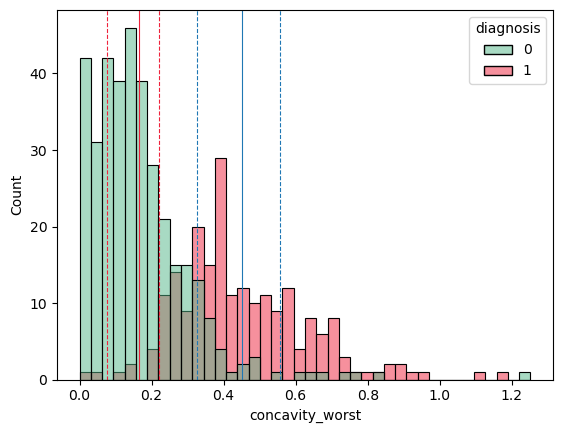

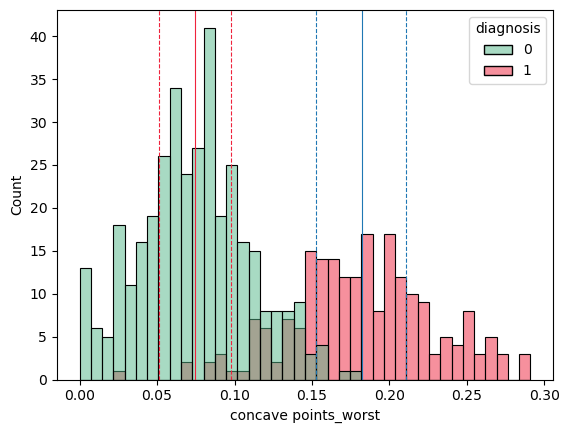

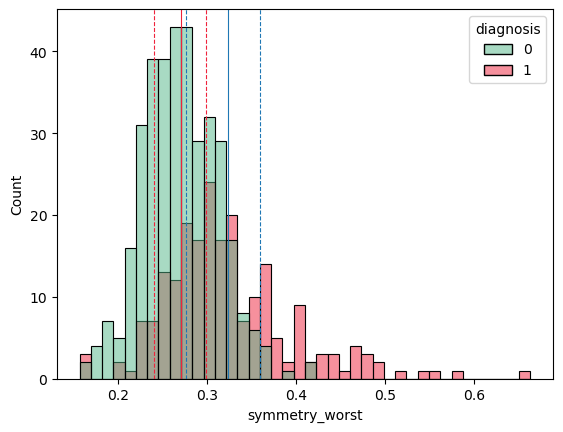

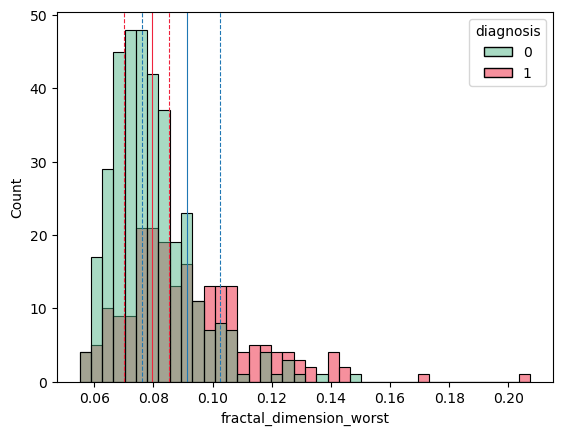

In [377]:
for i in df_without_target.columns:
    distplotea(i)

<AxesSubplot: xlabel='diagnosis', ylabel='count'>

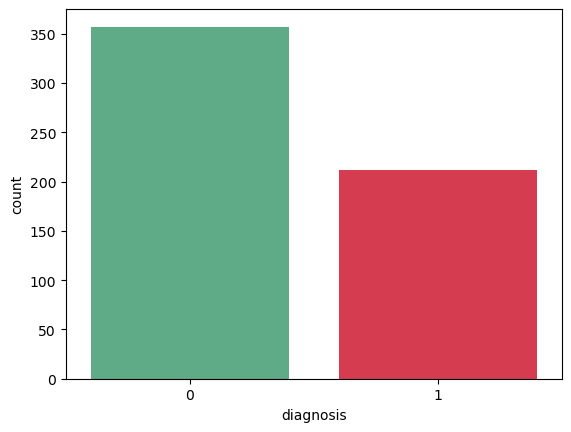

In [378]:
sns.countplot(data = df, x='diagnosis',palette=two_colors)

# Entrenamiento del modelo

## Split y estandarización de los datos 

### Split

In [379]:
x=df_2[df_without_target.columns]
y=df_2['diagnosis']

In [380]:
print(f'el tamaño de x:{x.shape} el tamaño de y:{y.shape}')

el tamaño de x:(569, 28) el tamaño de y:(569,)


In [381]:
x_train , x_test, y_train, y_test = train_test_split(x,y,shuffle=True,random_state=42,test_size=0.3)

In [382]:
print('x_train',x_train.shape,'x_test',x_test.shape,sep='\n')

x_train
(398, 28)
x_test
(171, 28)


In [383]:
print('y_train',y_train.shape,'y_test',y_test.shape,sep='\n')

y_train
(398,)
y_test
(171,)


### Escalarización de x

In [384]:
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

## Entrenamiento del modelo

In [385]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [386]:
prediction_test = model.predict(x_test)
print(accuracy_score(y_test,prediction_test))

0.9824561403508771


## Evaluación del modelo

In [387]:
weigths = pd.Series(model.coef_[0],index=x.columns.values)


In [388]:
data_weigths = pd.DataFrame(weigths.sort_values(ascending=True))
data_weigths

,0
fractal_dimension_se,-0.684957
compactness_mean,-0.609521
compactness_se,-0.587587
symmetry_se,-0.542200
symmetry_mean,-0.244134
texture_se,-0.201794
fractal_dimension_mean,-0.196450
compactness_worst,-0.102049
concavity_se,0.082845
fractal_dimension_worst,0.099387


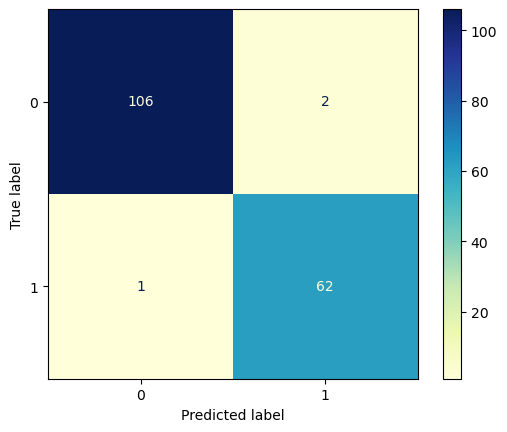

In [389]:
cm = confusion_matrix(y_test,prediction_test,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot(cmap='YlGnBu')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a8b65a30-ca8f-4fbb-bf3d-fb434b9cf324' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>